## Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

In [23]:
## loading data from csv to pandas dataframe
dataset = pd.read_csv('car dataset/car_data.csv')

## Encoding Categorical Data

In [24]:
## encoding "Fuel_Type" column
dataset.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

## encoding "Seller_Type" column
dataset.replace({'Seller_Type':{'Dealer': 0, 'Individual': 1}}, inplace=True)

## encoding "Transmission" column
dataset.replace({'Transmission':{'Manual': 0, 'Automatic': 1}}, inplace=True)

## Splitting the data into Features(X) and Label(Y)

In [25]:
X = dataset.drop(['Car_Name', 'Selling_Price'], axis=1)  # the 'Car_Name' column is not needed
Y = dataset['Selling_Price'] 

## Splitting the data into training and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

## Training our Model

In [27]:
## Using Lasso Regression Model
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

Lasso()

## Model Evaluation

In [28]:
## Predicting on training data
training_data_prediction = lasso_model.predict(X_train)

In [29]:
### R- Squared Error
from sklearn import metrics
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8427856123435795


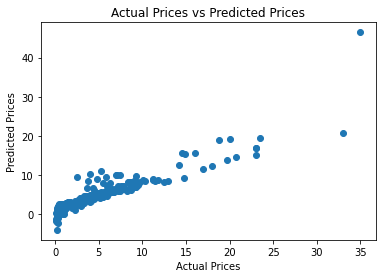

In [30]:
### Visualizing actual prices and predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [31]:
## Predicting on test data
test_data_prediction = lasso_model.predict(X_test)

In [32]:
### R- Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8709167941173195


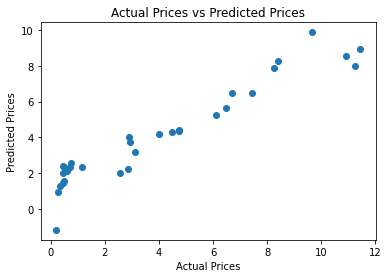

In [33]:
## Visualizing on test data
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()